In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
path = '/home/sadat/Documents/DSE/Data/yogurt.h5'

In [3]:
store = pd.HDFStore(path)
nrows = store.get_storer('groc').nrows
r = np.random.randint(0,nrows,size=50000)
df=pd.read_hdf(path,'groc',where=pd.Index(r))
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,file,year_int
3701704,287156,1644,0,1,70470,42398,7,38.43,NONE,0,0,yogurt_groc_1635_1686,11
13568916,272725,1672,0,1,70470,655,47,30.55,NONE,0,1,yogurt_groc_1635_1686,11
3996310,244343,1221,0,1,70470,657,6,3.78,NONE,0,0,yogurt_groc_1218_1269,3
7665696,237277,1437,0,1,70640,900,23,18.17,NONE,0,1,yogurt_groc_1427_1478,7
705533,656818,1642,0,1,36632,5590,23,52.67,NONE,0,0,yogurt_groc_1635_1686,11


In [4]:
df_pre07=df

In [5]:
df_pre07 = df_pre07[['UNITS','DOLLARS','D','PR']]

In [6]:
df_pre07.head()

,UNITS,DOLLARS,D,PR
3701704,7,38.43,0,0
13568916,47,30.55,0,1
3996310,6,3.78,0,0
7665696,23,18.17,0,1
705533,23,52.67,0,0


In [7]:
#We dont care about the size of the display and hence setting D=2 to 1.
df_pre07[df_pre07['D']==2] = 1
df_pre07.head()

/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,UNITS,DOLLARS,D,PR
3701704,7,38.43,0,0
13568916,47,30.55,0,1
3996310,6,3.78,0,0
7665696,23,18.17,0,1
705533,23,52.67,0,0


In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
X = df_pre07[['UNITS','D','PR']]
y = df_pre07['DOLLARS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.48083827089862125

In [10]:
from sklearn.svm import SVR

In [11]:
X = df_pre07[['UNITS','D','PR']]
y = df_pre07['DOLLARS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

reg = SVR()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.30808016438042851

#Products (Regressor)

In [12]:
prod_path='/home/sadat/Desktop/IRI Yogurt/parsed stub files/prod_yogurt.xls'
df = pd.read_excel(prod_path)

In [13]:
df = df.dropna()
df.head()

,L1,L2,L3,L4,L5,L9,Level,UPC,SY,GE,...,ITEM,*STUBSPEC 1284RC 00004,VOL_EQ,PRODUCT TYPE,PACKAGE,FLAVOR/SCENT,FAT CONTENT,CALORIE LEVEL,STYLE,TYPE OF YOGURT
0,CATEGORY - YOGURT,RFG YOGURT,AHAVA FOOD,AHAVA FOOD,AHAVA,+AHAVA RFG BUB YGRT L/FT 0.5PT,9,07-02-20742-07011,7,2,...,7011,+AHAVA RFG BUB YGRT L/FT 0.5PT 7 2 2...,0.500,YOGURT,PLASTIC CUP,BLUEBERRY,LOW FAT,MISSING,KOSHER,PRESTIRRED
1,CATEGORY - YOGURT,RFG YOGURT,AHAVA FOOD,AHAVA FOOD,AHAVA,+AHAVA RFG CHOC YGRT REG 0.375PT,9,00-03-70452-24101,0,3,...,24101,+AHAVA RFG CHOC YGRT REG 0.375PT 0 3 7...,0.375,YOGURT,PLASTIC CUP,CHOCOLATE,REGULAR,MISSING,KOSHER,BLENDED
2,CATEGORY - YOGURT,RFG YOGURT,AHAVA FOOD,AHAVA FOOD,AHAVA,+AHAVA RFG CHVNL YGRT L/FT 0.5PT,9,07-03-20742-07013,7,3,...,7013,+AHAVA RFG CHVNL YGRT L/FT 0.5PT 7 3 2...,0.500,YOGURT,PLASTIC CUP,CHERRY VANILLA,LOW FAT,MISSING,MISSING,FRUIT ON THE BOTTOM
3,CATEGORY - YOGURT,RFG YOGURT,AHAVA FOOD,AHAVA FOOD,AHAVA,+AHAVA RFG PLN YGRT L/FT 0.5PT,9,07-02-20742-07012,7,2,...,7012,+AHAVA RFG PLN YGRT L/FT 0.5PT 7 2 2...,0.500,YOGURT,PLASTIC CUP,PLAIN,LOW FAT,MISSING,KOSHER,REGULAR
4,CATEGORY - YOGURT,RFG YOGURT,AHAVA FOOD,AHAVA FOOD,AHAVA,+AHAVA RFG PLN YGRT REG 0.375PT,9,00-03-70452-24102,0,3,...,24102,+AHAVA RFG PLN YGRT REG 0.375PT 0 3 7...,0.375,YOGURT,PLASTIC CUP,PLAIN,REGULAR,120 CALORIES,ALL NATURAL,REGULAR


In [14]:
df.columns

Index([u'L1', u'L2', u'L3', u'L4', u'L5', u'L9', u'Level', u'UPC', u'SY',
       u'GE', u'VEND', u'ITEM',
       u'*STUBSPEC 1284RC                                                         00004  ',
       u'VOL_EQ', u'PRODUCT TYPE', u'PACKAGE', u'FLAVOR/SCENT', u'FAT CONTENT',
       u'CALORIE LEVEL', u'STYLE', u'TYPE OF YOGURT'],
      dtype='object')

In [15]:
dummies_L1=pd.get_dummies(df['L1'],prefix='L1')
dummies_PROD=pd.get_dummies(df['PRODUCT TYPE'],prefix='PROD')
dummies_FLAV=pd.get_dummies(df['FLAVOR/SCENT'],prefix='FLAV')
dummies_FAT=pd.get_dummies(df['FAT CONTENT'],prefix='FAT')
dummies_CAL=pd.get_dummies(df['CALORIE LEVEL'],prefix='CAL')
dummies_STYLE=pd.get_dummies(df['STYLE'],prefix='STYLE')
dummies_TYPE=pd.get_dummies(df['TYPE OF YOGURT'],prefix='TYPE')
dummies_PACK=pd.get_dummies(df['PACKAGE'],prefix='PACK')
prod = pd.concat([
       dummies_L1, dummies_PROD, dummies_PACK,
        dummies_FLAV, dummies_FAT, dummies_CAL,
        dummies_STYLE, dummies_TYPE, df
    ],axis=1)
prod = prod.drop(labels=['L1','L2','L3','L4','L5','L9','VOL_EQ','PRODUCT TYPE','FLAVOR/SCENT',
          'FAT CONTENT', 'CALORIE LEVEL', 'STYLE', 'TYPE OF YOGURT','VOL_EQ', 'PACKAGE','Level',
          '*STUBSPEC 1284RC                                                         00004  ','UPC'
                        ], axis=1)
prod.head()

,L1_CATEGORY - YOGURT,PROD_ACIDOPHILUS YOGURT,PROD_BUFFALO MILK YOGURT,PROD_CULTURED DAIRY DRINK,PROD_CULTURED SOY DRINK,PROD_CULTURED SOY SMOOTHI,PROD_DAIRY BLEND,PROD_DAIRY SNACK,PROD_GOATMILK YOGURT,PROD_GOATSMILK YOGRT DRNK,...,TYPE_REGULAR,TYPE_REGULAR STIR IN,TYPE_SAUCE ON THE BOTTOM,TYPE_STIR IN,TYPE_SYRUP ON THE BOTTOM,TYPE_WHIPPED,SY,GE,VEND,ITEM
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,2,20742,7011
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,70452,24101
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,3,20742,7013
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,7,2,20742,7012
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,3,70452,24102


In [16]:
store = pd.HDFStore(path)
nrows = store.get_storer('groc').nrows
r = np.random.randint(0,nrows,size=10000)
store_df=pd.read_hdf(path,'groc',where=pd.Index(r))
store_pre07=store_df[store_df['year_int']<7]
store_pre07 = store_pre07[['UNITS','DOLLARS','D','PR','SY','GE','VEND','ITEM']]

prod_store_pre_07=prod.merge(store_pre07, how='inner')

In [17]:
prod_store_pre_07.head()

,L1_CATEGORY - YOGURT,PROD_ACIDOPHILUS YOGURT,PROD_BUFFALO MILK YOGURT,PROD_CULTURED DAIRY DRINK,PROD_CULTURED SOY DRINK,PROD_CULTURED SOY SMOOTHI,PROD_DAIRY BLEND,PROD_DAIRY SNACK,PROD_GOATMILK YOGURT,PROD_GOATSMILK YOGRT DRNK,...,TYPE_SYRUP ON THE BOTTOM,TYPE_WHIPPED,SY,GE,VEND,ITEM,UNITS,DOLLARS,D,PR
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7,1,20742,7005,16,22.24,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,2,21000,12586,2,3.98,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,2,21000,935,8,16.00,0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,2,21000,935,4,10.36,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,71043,638,35,22.75,0,0


In [18]:
prod_store_pre_07['UNIT_PRICE']=prod_store_pre_07['DOLLARS']/prod_store_pre_07['UNITS']
prod_store_pre_07 = prod_store_pre_07.drop(['SY','GE','VEND','ITEM','DOLLARS'],axis=1)

In [19]:
prod_store_pre_07.head()

,L1_CATEGORY - YOGURT,PROD_ACIDOPHILUS YOGURT,PROD_BUFFALO MILK YOGURT,PROD_CULTURED DAIRY DRINK,PROD_CULTURED SOY DRINK,PROD_CULTURED SOY SMOOTHI,PROD_DAIRY BLEND,PROD_DAIRY SNACK,PROD_GOATMILK YOGURT,PROD_GOATSMILK YOGRT DRNK,...,TYPE_REGULAR,TYPE_REGULAR STIR IN,TYPE_SAUCE ON THE BOTTOM,TYPE_STIR IN,TYPE_SYRUP ON THE BOTTOM,TYPE_WHIPPED,UNITS,D,PR,UNIT_PRICE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16,0,0,1.39
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,1.99
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,0,1,2.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,2.59
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,35,0,0,0.65


In [20]:
from scipy.stats import pointbiserialr, spearmanr

columns = prod_store_pre_07.columns.values

In [21]:
param=[]
correlation=[]
abs_corr=[]

for c in columns:
    #Check if binary or continuous
    corr = spearmanr(prod_store_pre_07['UNITS'].values,
                     prod_store_pre_07[c].fillna(0).values)[0]
    param.append(c)
    correlation.append(corr)
    abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Drop NaN as these are caused by Speakmanr not handling too many 0's
param_df=param_df.dropna()

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,abs_corr,correlation
parameter,,
UNITS,1.000000,1.000000
UNIT_PRICE,0.499803,-0.499803
PACK_PLASTIC CUP,0.382498,0.382498
PR,0.257242,0.257242
PROD_YOGURT,0.228002,0.228002
CAL_MISSING,0.219348,-0.219348
FLAV_ASSORTED,0.197894,-0.197894
TYPE_MISSING,0.191128,-0.191128
TYPE_PRESTIRRED,0.189074,0.189074


####Without Feature Selection

In [22]:
y = prod_store_pre_07['UNITS']
X = prod_store_pre_07.drop('UNITS',axis=1)

In [23]:
X['UNIT_PRICE'] = X['UNIT_PRICE'].apply(lambda x:1 if x>X['UNIT_PRICE'].median() else 0)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train,y_train)
print rfr.score(X_test,y_test)

svr = SVR()
svr.fit(X_train,y_train)
print svr.score(X_test,y_test)

0.0319237813158
-0.0695781669772


####Ridge Feature Selection

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV

#feature selection
lcv = RidgeCV()
sfm = SelectFromModel(lcv, threshold=0.25)
sfm.fit(X, y)
X_new = sfm.transform(X)

print 'Selected %d features from the original %d'%(np.shape(X_new)[1], np.shape(X)[1])

Selected 261 features from the original 516


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=44)

rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train,y_train)
print rfr.score(X_test,y_test)

svr = SVR()
svr.fit(X_train,y_train)
print svr.score(X_test,y_test)

-0.00432930609643
-0.0379932830648


####Lasso Feature Selection

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV

#feature selection
lcv = LassoCV()
sfm = SelectFromModel(lcv, threshold=0.25)
sfm.fit(X, y)
X_new = sfm.transform(X)

print 'Selected %d features from the original %d'%(np.shape(X_new)[1], np.shape(X)[1])

Selected 16 features from the original 516


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=44)

rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train,y_train)
print rfr.score(X_test,y_test)

svr = SVR()
svr.fit(X_train,y_train)
print svr.score(X_test,y_test)

0.110275717542
0.0513362758682


####Optimize SVR with Ridge

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV

#feature selection
lcv = RidgeCV()
sfm = SelectFromModel(lcv, threshold=0.25)
sfm.fit(X, y)
X_new = sfm.transform(X)

print 'Selected %d features from the original %d'%(np.shape(X_new)[1], np.shape(X)[1])

Selected 261 features from the original 516


In [30]:
svr = SVR()
svr.fit(X_train,y_train)
print svr.score(X_test,y_test)

0.0513362758682


##Classification

In [31]:
y_new =y.apply(lambda x:1 if x>y.median() else 0)

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV

#feature selection
lcv = RidgeCV()
sfm = SelectFromModel(lcv, threshold=0.25)
sfm.fit(X, y)
X_new = sfm.transform(X)

print 'Selected %d features from the original %d'%(np.shape(X_new)[1], np.shape(X)[1])

Selected 261 features from the original 516


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=44)

rfr = RandomForestClassifier(n_jobs=-1)
rfr.fit(X_train,y_train)
print rfr.score(X_test,y_test)

svr = SVC()
svr.fit(X_train,y_train)
print svr.score(X_test,y_test)

0.671358629131
0.68482252142


In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV

#feature selection
lcv = LassoCV()
sfm = SelectFromModel(lcv, threshold=0.25)
sfm.fit(X, y)
X_new = sfm.transform(X)

print 'Selected %d features from the original %d'%(np.shape(X_new)[1], np.shape(X)[1])

Selected 16 features from the original 516


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=44)

rfr = RandomForestClassifier(n_jobs=-1)
rfr.fit(X_train,y_train)
print rfr.score(X_test,y_test)

svr = SVC()
svr.fit(X_train,y_train)
print svr.score(X_test,y_test)

0.681150550796
0.685434516524


##Test Different SVC

####No Feature Selection

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=44)

def clf(kernel='rbf', degree=3):
    svr = SVC(kernel=kernel,degree=degree)
    svr.fit(X_train,y_train)
    return svr.score(X_test,y_test)    

print 'rbf', clf()
print 'sigmoid', clf('sigmoid')
print 'poly1', clf('poly',1)
print 'poly2', clf('poly',2)
print 'poly3', clf('poly',3)
print 'poly4', clf('poly',4)
print 'poly5', clf('poly',5)

rbf 0.0587515299878
sigmoid 0.0538555691554
poly1 0.062423500612
poly2 0.0544675642595
poly3 0.0538555691554
poly4 0.0538555691554
poly5 0.0538555691554


In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV

#feature selection
lcv = LassoCV()
sfm = SelectFromModel(lcv, threshold=0.25)
sfm.fit(X, y)
X_new = sfm.transform(X)

print 'Selected %d features from the original %d'%(np.shape(X_new)[1], np.shape(X)[1])

Selected 16 features from the original 516


####Lasso

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=44)

def clf(kernel='rbf', degree=3):
    svr = SVC(kernel=kernel,degree=degree)
    svr.fit(X_train,y_train)
    return svr.score(X_test,y_test)    

print 'rbf', clf()
print 'sigmoid', clf('sigmoid')
print 'poly1', clf('poly',1)
print 'poly2', clf('poly',2)
print 'poly3', clf('poly',3)
print 'poly4', clf('poly',4)
print 'poly5', clf('poly',5)

rbf 0.685434516524
sigmoid 0.49388004896
poly1 0.685434516524
poly2 0.685434516524
poly3 0.673194614443
poly4 0.569155446756
poly5 0.49388004896


In [46]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.33, random_state=44)

def clf(penalty, dual=False):
    svr = LinearSVC(penalty=penalty, dual=dual)
    svr.fit(X_train,y_train)
    return svr.score(X_test,y_test)    

print 'l1', clf('l1')
print 'l2', clf('l2')
print 'dual', clf('l2', True)

l1 0.692778457772
l2 0.69400244798
dual 0.69400244798


In [47]:
from sklearn.svm import NuSVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=44)

def clf(kernel='rbf', degree=3):
    svr = NuSVC(kernel=kernel,degree=degree)
    svr.fit(X_train,y_train)
    return svr.score(X_test,y_test)    

print 'rbf', clf()
print 'sigmoid', clf('sigmoid')
print 'poly1', clf('poly',1)
print 'poly2', clf('poly',2)
print 'poly3', clf('poly',3)
print 'poly4', clf('poly',4)
print 'poly5', clf('poly',5)

rbf 0.573439412485
sigmoid 0.50611995104
poly1 0.570991432069
poly2 0.596083231334
poly3 0.585679314565
poly4 0.630966952264
poly5 0.537331701346


##Optimize LinearSVC with L2 penalty

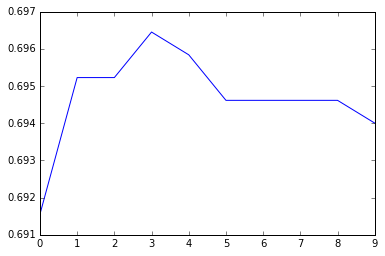

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.33, random_state=44)

def clf(c, penalty='l2', dual=False):
    svr = LinearSVC(C=c,penalty=penalty, dual=dual)
    svr.fit(X_train,y_train)
    return svr.score(X_test,y_test)    

scores = []
for c in np.linspace(0.1,1,10):
    scores.append(clf(c))
plt.plot(scores);

In [62]:
clf(0.3)

0.6952264381884945

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6940024479804161